<center>

# Des suites complexes aux ensembles fractals</center>

L'objectif de cette séance est d'écrire un programme utilisant les nombres complexes afin de produire des images numériques représentant des ensembles fractals. Afin d'y parvenir nous procéderons en deux parties :

* La première est nécessaire afin de comprendre les différents procédés appliqués à un nombre complexe initial $z_0$ puis itérés afin d'obtenir un tel ensemble.

* La seconde est davantage centrée sur le programme retranscrivant ce processus en python.


## I. Suites complexes
### I.1) Un cas simple
Commençons par examiner la suite complexe suivante :   $ \bigg\{
    \begin{array}{ll}
        z_0 \in \mathbb{C}\\
       \forall n \in \mathbb{N},  ~z_{n+1}=z_n^2
    \end{array} $

Il nous faut donc choisir une valeur initiale complexe $z_0$ et déterminer ce qu'il advient de $z_n$ lorsque $n$ tend vers l'infini.

Afin de vous aider à élaborer des conjectures, vous pouvez utiliser la commande suivante :  <b> square_orbit( $x_0$, $y_0$)</b>.

>Où: $x_0$ est la partie réelle de $z_0$ et $y_0$ sa partie imaginaire.

Cette commande va représenter dans le plan complexe les points dont les affixes sont données par la suite $(z_n)$.
En voici un exemple ci-dessous, il suffit de changer les valeurs initiales afin de les faire correspondre au point de départ que vous voulez tester. 
Il est également possible de les modifier en déplaçant $z_0$ à l'aide de la souris!


In [1]:
# !pip install bqplot # si necessaire
from julia import* # on importe les différentes commandes utilisees

In [2]:
square_orbit( x0 = -0.15, y0 = -0.85)

Figure(axes=[Axis(grid_lines='none', offset={'value': 0.5}, scale=LinearScale(max=1.2, min=-1.2)), Axis(grid_l…

   >On peut a priori distinguer deux cas :  Soit les points se rapprochent de l'origine du repère, soit ils semblent s'en éloigner indéfiniment.

Voyons si nous pouvons expliquer cela : premièrement, que se passe-t-il lorqu'un nombre complexe $z$ est élevé au carré?

Afin de déterminer cela, il est plus simple d'utiliser la forme exponentielle de $z$ : $~z=|z|e^{i\theta}~$ donc $~z^2=|z|^2e^{2i\theta}$ où $\theta$ est un argument de $z$.

<img src= "z2.png" style = 'width: 400px; height: 600' />

La représentation graphique ci-dessus est un exemple de l'élévation au carré d'un nombre complexe d'un point de vue géométrique.

Quand un nombre complexe est élevé au carré, son module est élevé au carré mais son argument est doublé.

Oublions l'argument un instant et concentrons nous sur le module :

* Si $|z|<1$ alors $|z^2| < |z|<1$.

   > Donc si l'on choisit $z_0$ <b>à l'intérieur du cercle unité </b> et que l'on continue à élever les valeurs obtenues au carré, la suite $(|z_n|)_{n\in\mathbb{N}}$ est géométrique de raison $|z_0|^2<1$ donc converge vers 0. Ainsi les points d'affixe $(z_n)$ se rapprochent de l'origine lorsque $n$ tend vers $+\infty$.

* Si $|z|=1$ alors $|z^2| = |z|=1$.

   >Donc si l'on choisit $z_0$ <b>sur le cercle unité</b> et que l'on continue à élever les valeurs obtenues au carré, la suite $(|z_n|)$ est constante. Ainsi les points d'affixe $(z_n)_{n\in\mathbb{N}}$ "circulent" sur le cercle unité sans nécessairement converger.

* Si $|z|>1$ alors $|z^2| > |z|>1$.

  > Donc si l'on choisit $z_0$ <b>à l'extérieur du cercle unité</b> et que l'on continue à élever les valeurs obtenues au carré,  la suite $(|z_n|)_{n\in\mathbb{N}}$ est géométrique de raison $|z_0|^2>1$, donc divergente. Ainsi les points d'affixe $(z_n)$ s'éloignent indéfiniment de l'origine.

Dans le dernier cas, nous appellerons le poitn d'affixe $z_0$ un <b> point d'échappement </b>.

Tandis que dans les deux premiers cas $|z_n|$ reste borné pour tout entier naturel $n$, on appelera donc le poitn d'affixe $z_0$ un <b> point captif </b>.


> <b> L'ensemble de Julia </b> est alors défini comme la "frontière" entre l'ensemble des points d'échappement et celui des points captifs.

Ainsi dans notre cas particulier, l'ensemble de Julia est le <b>cercle unité</b>.

### I.2) Cas général

 Au lieu de se contenter d'élever chaque terme au carré, nous allons à présent aussi rajouter un autre nombre complexe constant $c$ pouvant être interprété comme un vecteur permettant de ramener notre suite vers l'origine du plan complexe.
 
 Ci-dessous une représentation géométrique de ce nouveau procédé :
 
<img src= "z2+c.png" style = 'width: 400px; height: 600px' />
 
Ainsi notre nouvelle suite complexe $(z_n)$ est à présent définier par :   $ \bigg\{
    \begin{array}{ll}
        z_0 \in \mathbb{C}\\
       \forall n \in \mathbb{N},  ~z_{n+1}=z_n^2+c
    \end{array} $
   
   Il est à présent beaucoup plus compliqué de déterminer si $z_0$ est un point d'échappement ou un point captif lorsque que l'on itère ce procédé puisqu'il dépend également de la valeur choisie pour $c$.
   
   Nous pouvons tout de même tenter une conjecture avec la commande suivante :  <b> plot_orbit( $x_0$, $y_0$, $a$, $b$ )</b>.
>Où : 
>*  $x_0$ est la partie réelle de $z_0$ et $y_0$ est sa partie imaginaire.
>* $a$ est la partie réelle de $c$ et $b$ est sa partie imaginaire.

Il nous faut à présent fixer une valeur $c = a+ ib$ et déterminer la frontière entre les $z_0= x +iy$ qui sont des points d'échappement et les autres.

In [3]:
plot_orbit(x0 = 0.5, y0 = 0.5, a = 0.25, b = 0.3)

Figure(axes=[Axis(grid_lines='none', offset={'value': 0.5}, scale=LinearScale(max=1.2, min=-1.2)), Axis(grid_l…

## II. Programmer une représentation des ensembles de Julia

Même avec la commande $\text{plot_orbit}$, il reste très difficile de se faire une idée précise de l'ensemble de Julia correspondant à une valeur de $c$ donnée.

Essayons une autre approche, mais tout d'abord il nous faut comprendre comment est définie une image numérique.

> L'idée clef est que lorsque vous avez une image affichée à l'écran, elle est composée de petits carrés lumineux appelés pixels.
>
>À chacun d'entre eux est associé une couleur correspondant à l'image quelle qu'elle soit. Ainsi une image numérique n'est rien de plus qu'une grille de pixels contenant des valeurs (ce qui en mathématiques s'appelle une matrice).

Ainsi, afin de déterminer notre ensemble de Julia, nous allons commencer avec une image vide dont chaque pixel est associé à une valeur initiale $z_0$.

Ensuite il nous faut calculer les termes de la suite et selon l'évolution de $z_n$ pour $n$ suffisamment grand, $z_0$ sera considéré comme un point d'échappement ou un point captif et nous lui attribuerons une couleur en fonction de cela.

Pour ce faire, nous admettrons que le critère suivant est vrai :

> <b> Critère : </b>  S'il existe un rang $n$ tel que $|z_n|$ > 2, $z_0$ correspond à un point d'échappement.

Notez bien qu'il est impossible de calculer un nombre infini de valeurs, nous déciderons donc d'un seuil $n_{max}$ à partir duquel on considèrera que le point est captif.


In [12]:
# parametrage de la fenetre

x_min = -1.5
x_max =  1.5
y_min = -1.5
y_max =  1.5

# taille de l'image de sortie : 500px*500px 

largeur = 500

# une fonction qui associe a un pixel donne un point du plan complexe

def pixel_to_complex(x,y): 
    
    x0 = x_min + x*(x_max-x_min)/(largeur)  
    y0 = y_max - y*(y_max-y_min)/(largeur)
    
    return x0,y0
    
# la fonction creant l'image representant l'ensemble de Julia

def julia(a, b, n_max):
    
    c = complex(a,b)
    
    img = np.zeros((largeur, largeur,3),dtype=np.uint8) # defini une image comme etant une matrice carree remplie de zeros

    for x in range(largeur): # la premiere boucle parcourt les colonnes de la grille 
        
        for y in range(largeur): # la deuxieme parcourt les lignes

                k = 0     # k est le rang du terme de la suite

                # ce qui suit designe les coordonnes complexes du point initial z0 :
                
                x0, y0 = pixel_to_complex(x,y)
                
                z = complex(x0,y0) # voici z0

                while k < n_max and abs(z) < 2 : # abs(z) est le module de z en python
                    # la valeur suivante de z est calculee ci-apres et remplace la precedente
                    z = z**2 + c   #** correspond a une puissance en python
                    k = k + 1      # le rang du terme de la suite augmente de 1

                if k >= n_max and  abs(z) <=2:  
                    # si en fin de boucle le module est encore <2, z est considere comme captif
                    img[y,x] = 0  # la couleur du pixel devient alors noire

                else:       # dans le cas contraire il s'agit necessairement d'un point d'echappement
                    img[y,x] = 255 # blanc
                    #img[y,x] = 255*(k/n_max) # nuance de gris basee sur le rang d'echappement
    plt.rcParams["figure.figsize"] = (30,15)
    plt.axis('off')
    plt.imshow(img)
    return(img)

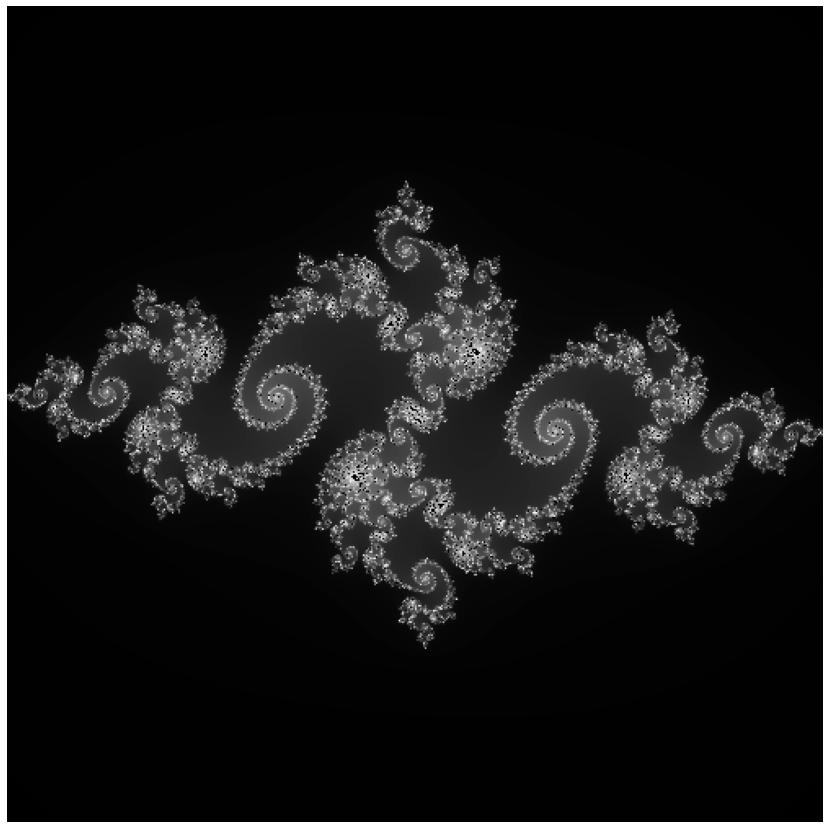

In [13]:
Julia = julia( a = -0.772691322542185, b = 0.124281466072787, n_max = 200)

* Que constatez vous en changeant la valeur du seuil $n_{max}$? Essayez $n_{max} = 20$ par exemple.

* Vous pouvez également essayer d'obtenir une image plus détaillée en fixant la largeur à 1000 mais le temps de calcul sera plus long.

* Maintenant essayez des nouvelles valeurs de $c$ (vous pouvez essayer des nombres aléatoires, ou bien votre date de naissance sous la forme suivante par exemple : 0.JJMMAA + MMJJAA$i$) jusqu'à trouver votre ensemble de Julia préféré. 

Une fois ceci fait il est possible de la sauvegarder (clic droit, enregistrer l'image sous...).

# Conclusion

Félicitations, vous avez atteint la fin de ce notebook!

Si vous pensez en avoir maîtrisé l'entièreté, voici quelques idées afin d'approfondir le sujet :

* Les ensembles fractals gagnent à être colorés, peut-être apprécierez vous de trouver une manière moins fade que des nuances de gris pour les représenter. Sachez pour cela qu'il faudra attribuer, au lieu d'une seul valeur, un triplet de valeur (Rouge, Vert, Bleu) à chaque pixel. En bref img[y,x] = (R,V,B) où il vous revient de choisir les valeurs R,V,B.


* Les ensembles de Julia sont très liés à un autre ensemble fractal célèbre : l'ensemble de Mandelbrot. Pour le construire, on raisonne de manière similaire aux ensembles de Julia, excepté que l'on inverse les rôles de $z_0$ et de $c$ et l'on fixe $z_0$ à 0.


* Commme vous l'aurez remarqué les ensemble de Julia sont autosimilaires, ce qui signifie que vous pouvez zoomer sur l'image et toujours observer les mêmes motifs à des échelles variées. Vous pouvez essayer de rajouter un argument "zoom" à la fonction julia et jouer avec ce nouveau paramètre afin d'obtenir une version agrandie en fin de programme. 
